In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

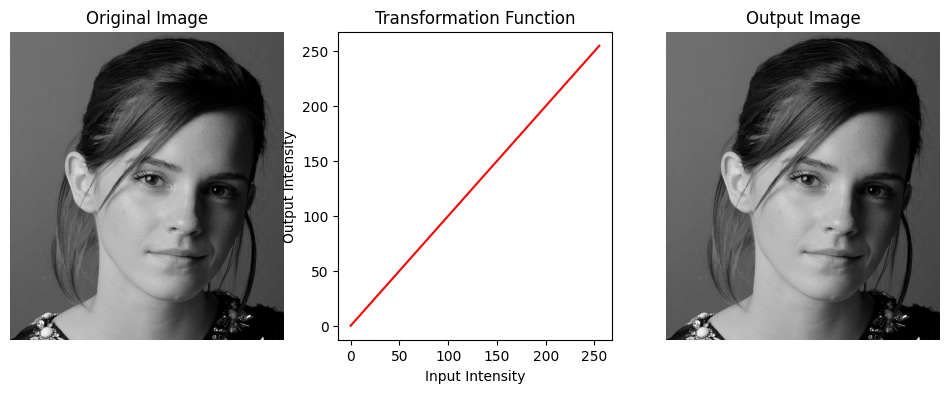

In [14]:
image_path = r"D:\Academics\EN3160 - Image Processing and Machine Vision\images\emma.jpg"

input_im = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
t = np.arange(256, dtype=np.uint8)

fig, ax = plt.subplots(1, 3, figsize=(12,4))

ax[0].imshow(input_im, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].plot(t, 'r')
ax[1].set_title('Transformation Function')
ax[1].set_xlabel('Input Intensity')
ax[1].set_ylabel('Output Intensity')

output_im = cv.LUT(input_im, t)
ax[2].imshow(output_im, cmap='gray')
ax[2].set_title('Output Image')
ax[2].axis('off')

plt.show()

Complement of identity transfer function

In [15]:
g = 255 - np.arange(256, dtype=np.uint8)

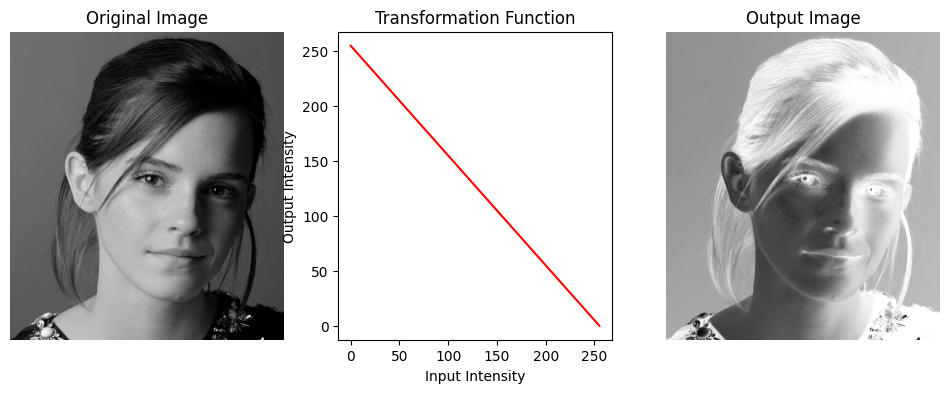

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))

ax[0].imshow(input_im, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].plot(g, 'r')
ax[1].set_title('Transformation Function')
ax[1].set_xlabel('Input Intensity')
ax[1].set_ylabel('Output Intensity')

output_im = cv.LUT(input_im, g)
ax[2].imshow(output_im, cmap='gray')
ax[2].set_title('Output Image')
ax[2].axis('off')

plt.show()

Intensity Windowing

In [36]:
t1 = np.linspace(0, 50,101).astype(np.uint8)
t2 = np.linspace(51, 200,50).astype(np.uint8)
t3 = np.linspace(201, 255,255-150).astype(np.uint8)
t1,t2,t3, t3.shape

(array([ 0,  0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,
         8,  9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16,
        17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25,
        25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33,
        34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42,
        42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 50],
       dtype=uint8),
 array([ 51,  54,  57,  60,  63,  66,  69,  72,  75,  78,  81,  84,  87,
         90,  93,  96,  99, 102, 105, 108, 111, 114, 117, 120, 123, 127,
        130, 133, 136, 139, 142, 145, 148, 151, 154, 157, 160, 163, 166,
        169, 172, 175, 178, 181, 184, 187, 190, 193, 196, 200], dtype=uint8),
 array([201, 201, 202, 202, 203, 203, 204, 204, 205, 205, 206, 206, 207,
        207, 208, 208, 209, 209, 210, 210, 211, 211, 212, 212, 213, 213,
        214, 215, 215, 216, 216, 217, 217, 218, 218, 219, 219, 220, 220,
        22

In [39]:
intensity_window = np.concatenate((t1,t2,t3), axis=0)
intensity_window.shape, intensity_window

((256,),
 array([  0,   0,   1,   1,   2,   2,   3,   3,   4,   4,   5,   5,   6,
          6,   7,   7,   8,   8,   9,   9,  10,  10,  11,  11,  12,  12,
         13,  13,  14,  14,  15,  15,  16,  16,  17,  17,  18,  18,  19,
         19,  20,  20,  21,  21,  22,  22,  23,  23,  24,  24,  25,  25,
         26,  26,  27,  27,  28,  28,  29,  29,  30,  30,  31,  31,  32,
         32,  33,  33,  34,  34,  35,  35,  36,  36,  37,  37,  38,  38,
         39,  39,  40,  40,  41,  41,  42,  42,  43,  43,  44,  44,  45,
         45,  46,  46,  47,  47,  48,  48,  49,  49,  50,  51,  54,  57,
         60,  63,  66,  69,  72,  75,  78,  81,  84,  87,  90,  93,  96,
         99, 102, 105, 108, 111, 114, 117, 120, 123, 127, 130, 133, 136,
        139, 142, 145, 148, 151, 154, 157, 160, 163, 166, 169, 172, 175,
        178, 181, 184, 187, 190, 193, 196, 200, 201, 201, 202, 202, 203,
        203, 204, 204, 205, 205, 206, 206, 207, 207, 208, 208, 209, 209,
        210, 210, 211, 211, 212, 212, 213,

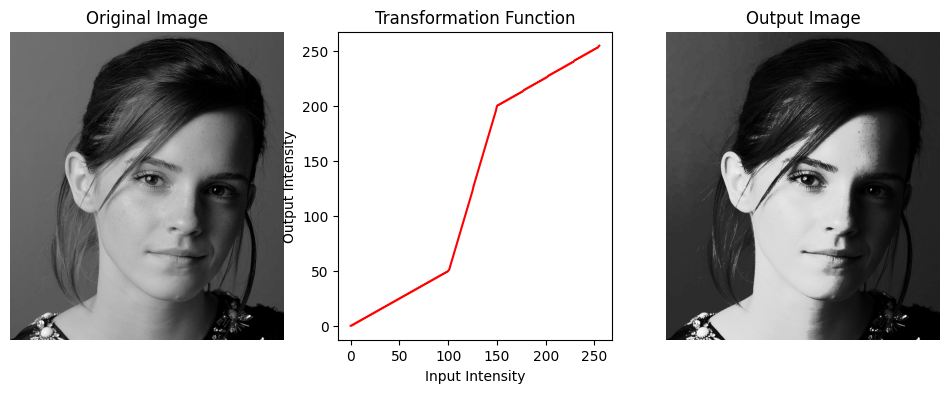

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))

ax[0].imshow(input_im, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].plot(intensity_window, 'r')
ax[1].set_title('Transformation Function')
ax[1].set_xlabel('Input Intensity')
ax[1].set_ylabel('Output Intensity')

output_im = cv.LUT(input_im, intensity_window)
ax[2].imshow(output_im, cmap='gray')
ax[2].set_title('Output Image')
ax[2].axis('off')

plt.show()

Gamma correction

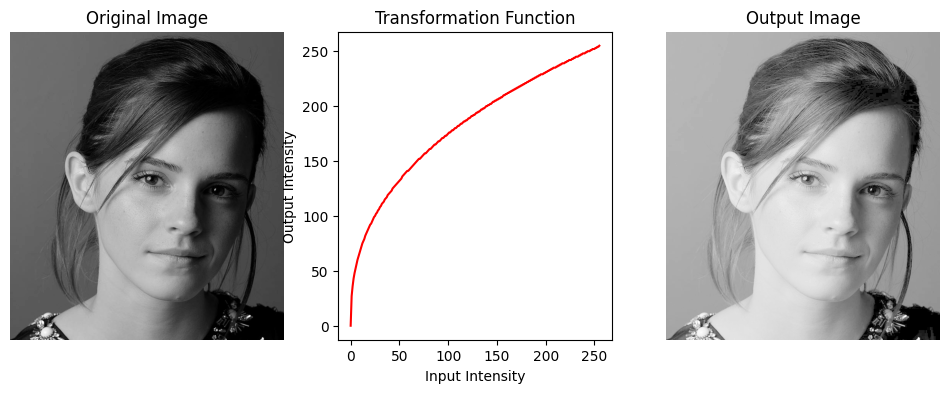

In [51]:
gamma = 0.4
gamma_transform = np.array([((i/255.0)**gamma)*255 for i in np.arange(256)]).astype(np.uint8)

fig, ax = plt.subplots(1, 3, figsize=(12,4))

ax[0].imshow(input_im, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].plot(gamma_transform, 'r')
ax[1].set_title('Transformation Function')
ax[1].set_xlabel('Input Intensity')
ax[1].set_ylabel('Output Intensity')

output_im = cv.LUT(input_im, gamma_transform)
ax[2].imshow(output_im, cmap='gray')
ax[2].set_title('Output Image')
ax[2].axis('off')

plt.show()

Histograms

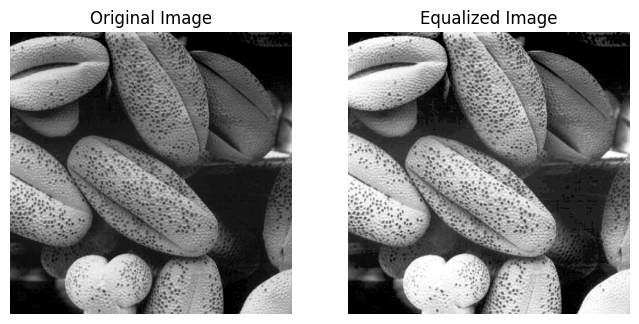

In [55]:
shells_path = r"D:\Academics\EN3160 - Image Processing and Machine Vision\images\shells.tif"

shells_im = cv.imread(shells_path, cv.IMREAD_GRAYSCALE)

t_hist = cv.equalizeHist(shells_im)

fig, ax = plt.subplots(1, 2, figsize=(8,4))

ax[0].imshow(shells_im, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(t_hist, cmap='gray')
ax[1].set_title('Equalized Image')
ax[1].axis('off')

plt.show()

Histogram equalization formula

[  0   0   0   0   0   0   0   0   0   0   0   0   0  18  18  18  20  30
  31  48  59  62  68  69  74  75  79  82  84  90  92  96  98 103 106 112
 115 120 127 131 135 139 146 148 155 156 163 173 176 182 185 190 194 197
 201 207 213 214 219 221 225 226 230 230 232 236 239 239 242 243 244 246
 248 249 251 252 253 254 254 254 254 254 254 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

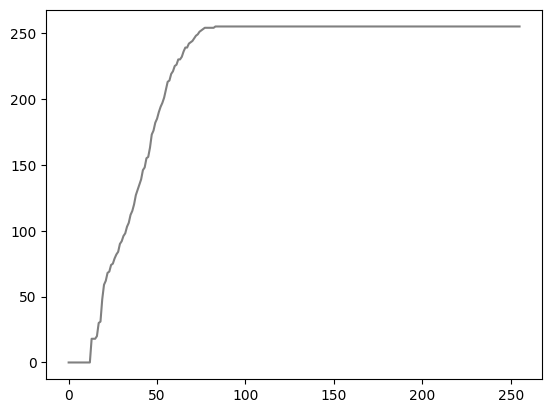

In [73]:
def hist_equalized(image_array, L):

    histogram, bins = np.histogram(image_array.flatten(), L, [0,L])
    cdf = histogram.cumsum()
    M, N = image_array.shape
    
    hist_equalized = (((L-1)/(M*N))*cdf).astype(np.uint8)

    return histogram, bins, hist_equalized

hist, bins, cdf = hist_equalized(shells_im, 256)
# plot histogram
#plt.plot(hist, color='gray')
#print(hist)
print(cdf)
plt.plot(cdf, color='gray')

In [74]:
def hist_equalized(image_array, L):

    histogram, bins = np.histogram(image_array.flatten(), L, [0,L])
    cdf = histogram.cumsum()
    M, N = image_array.shape
    
    hist_equalized = (((L-1)/(M*N))*cdf).astype(np.uint8)

    return hist_equalized

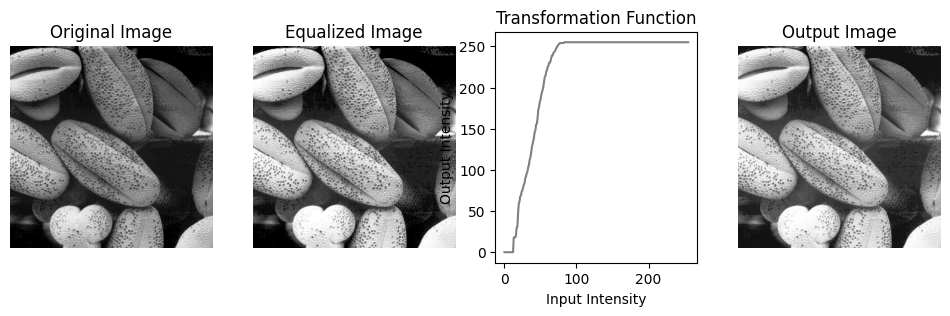

In [76]:
L = 256

hist_equalization = hist_equalized(shells_im, L)
equalized_im = cv.LUT(shells_im, hist_equalization)

fig, ax = plt.subplots(1, 4, figsize=(12,3))

ax[0].imshow(shells_im, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(t_hist, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Equalized Image')
ax[1].axis('off')

ax[2].plot(hist_equalization, color='gray')
ax[2].set_title('Transformation Function')
ax[2].set_xlabel('Input Intensity')
ax[2].set_ylabel('Output Intensity')

ax[3].imshow(equalized_im, cmap='gray', vmin=0, vmax=255)
ax[3].set_title('Output Image')
ax[3].axis('off')

plt.show()